### Greetings to everyone!!
- Ill be creating a model on the basis of data of the Loan Defaulters 

### Importing the Libraries
- Numpy
- Pandas
- Matplotlib
- Seaborn
- From sklearn
  - Scipy
  - Label Encoder
  - Model Selection
  - Decision Tree
  - Random Forest
- From imblearn
  - Random OverSampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#calling the data from csv file and checking the head of the data
df = pd.read_csv("credit_train.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Exploratory Data Analysis

In [3]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [4]:
# Descriptive analysis of the Data
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


## By looking at the above description we can say that
- The mean value of monthly Debt is 18742.4
- Maximum Credit problems arises are 15

In [5]:
#As the Loan ID and Customer ID column is not needed, so I dropped the columns

df.drop(["Loan ID","Customer ID"],axis=1, inplace = True)

In [6]:
df.isna().sum()

#To check the missing values in the Dataset

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

<AxesSubplot:>

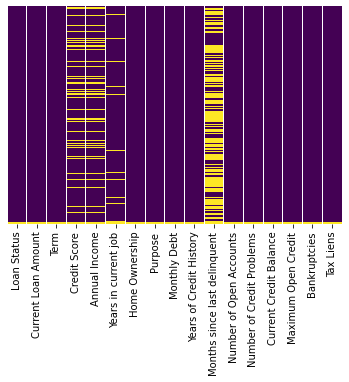

In [7]:
#To visualize the null values in the Data set
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [8]:
#Looking at the dataset, columnns which have more than 50% missing values needs to be dropped

df.drop(["Months since last delinquent"],axis = 1, inplace = True)
df.drop(["Credit Score"],axis = 1, inplace = True)
df.drop(["Annual Income"],axis = 1, inplace = True)

In [9]:
# Coulmns that has less than 50% missing values were simply handled by dropna feature
df.dropna(inplace = True)

In [10]:
df.head()

,Loan Status,Current Loan Amount,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [11]:
df.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

<AxesSubplot:>

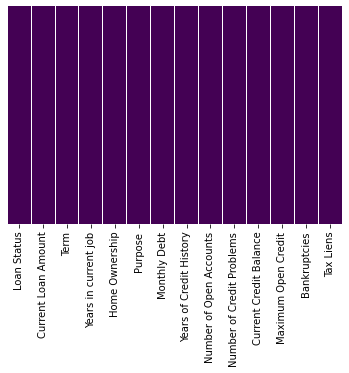

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Now there are no missing values!!

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95572 entries, 0 to 99998
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                95572 non-null  object 
 1   Current Loan Amount        95572 non-null  float64
 2   Term                       95572 non-null  object 
 3   Years in current job       95572 non-null  object 
 4   Home Ownership             95572 non-null  object 
 5   Purpose                    95572 non-null  object 
 6   Monthly Debt               95572 non-null  float64
 7   Years of Credit History    95572 non-null  float64
 8   Number of Open Accounts    95572 non-null  float64
 9   Number of Credit Problems  95572 non-null  float64
 10  Current Credit Balance     95572 non-null  float64
 11  Maximum Open Credit        95572 non-null  float64
 12  Bankruptcies               95572 non-null  float64
 13  Tax Liens                  95572 non-null  flo

In [14]:
# checking the correlation between the columns
df.corr().style.background_gradient()

,Current Loan Amount,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.007967,0.018941,0.000731,-0.003692,0.003870,-0.001092,-0.001133,-0.003228
Monthly Debt,-0.007967,1.000000,0.218537,0.407513,-0.049283,0.482037,0.039326,-0.072196,0.021759
Years of Credit History,0.018941,0.218537,1.000000,0.139674,0.057824,0.215992,0.030196,0.061097,0.017175
Number of Open Accounts,0.000731,0.407513,0.139674,1.000000,-0.009716,0.225043,0.030088,-0.017804,0.005862
Number of Credit Problems,-0.003692,-0.049283,0.057824,-0.009716,1.000000,-0.110298,-0.011487,0.751056,0.581465
Current Credit Balance,0.003870,0.482037,0.215992,0.225043,-0.110298,1.000000,0.136555,-0.119691,-0.015566
Maximum Open Credit,-0.001092,0.039326,0.030196,0.030088,-0.011487,0.136555,1.000000,-0.013958,-0.001068
Bankruptcies,-0.001133,-0.072196,0.061097,-0.017804,0.751056,-0.119691,-0.013958,1.000000,0.044269
Tax Liens,-0.003228,0.021759,0.017175,0.005862,0.581465,-0.015566,-0.001068,0.044269,1.000000


### - By this analysis we can say that,
- 1) Bankruptcies and Tax liens has high correlation with Number of credit problems
- 2) Current credit balance has some correlation with Monthly debt

In [15]:
df["Loan Status"].value_counts()

Fully Paid     74257
Charged Off    21315
Name: Loan Status, dtype: int64

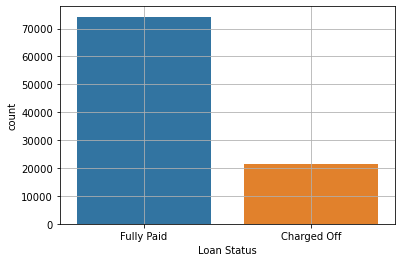

In [16]:
# checking the count of people who have fully paid and failed to pay
sns.countplot(data = df, x= "Loan Status")
plt.grid(True)

In [17]:
df["Purpose"].value_counts()

Debt Consolidation      75277
other                    5665
Home Improvements        5511
Other                    3104
Business Loan            1519
Buy a Car                1208
Medical Bills            1041
Buy House                 652
Take a Trip               546
major_purchase            333
small_business            272
moving                    139
wedding                   111
vacation                   95
Educational Expenses       89
renewable_energy           10
Name: Purpose, dtype: int64

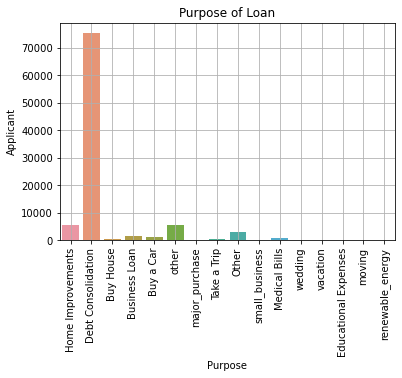

In [18]:
# Purpose of the Loan that was taken
sns.countplot(data = df, x= "Purpose")
plt.title("Purpose of Loan")
plt.xlabel("Purpose")
plt.ylabel("Applicant")
plt.xticks(rotation=90)
plt.grid(True)

### By this visualization we can say that
- the highest reason for the loan was Debt consolidation

In [19]:
df["Years in current job"].value_counts()

10+ years    31090
2 years       9104
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
9 years       3949
Name: Years in current job, dtype: int64

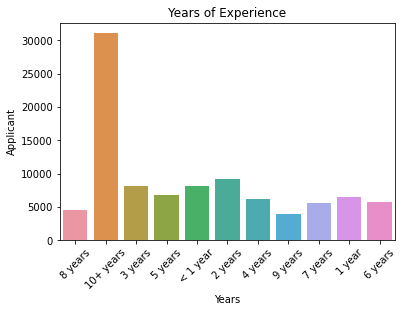

In [20]:
sns.countplot(data = df, x= "Years in current job")
plt.title("Years of Experience")
plt.xlabel("Years")
plt.ylabel("Applicant")
plt.xticks(rotation=45)
plt.show()


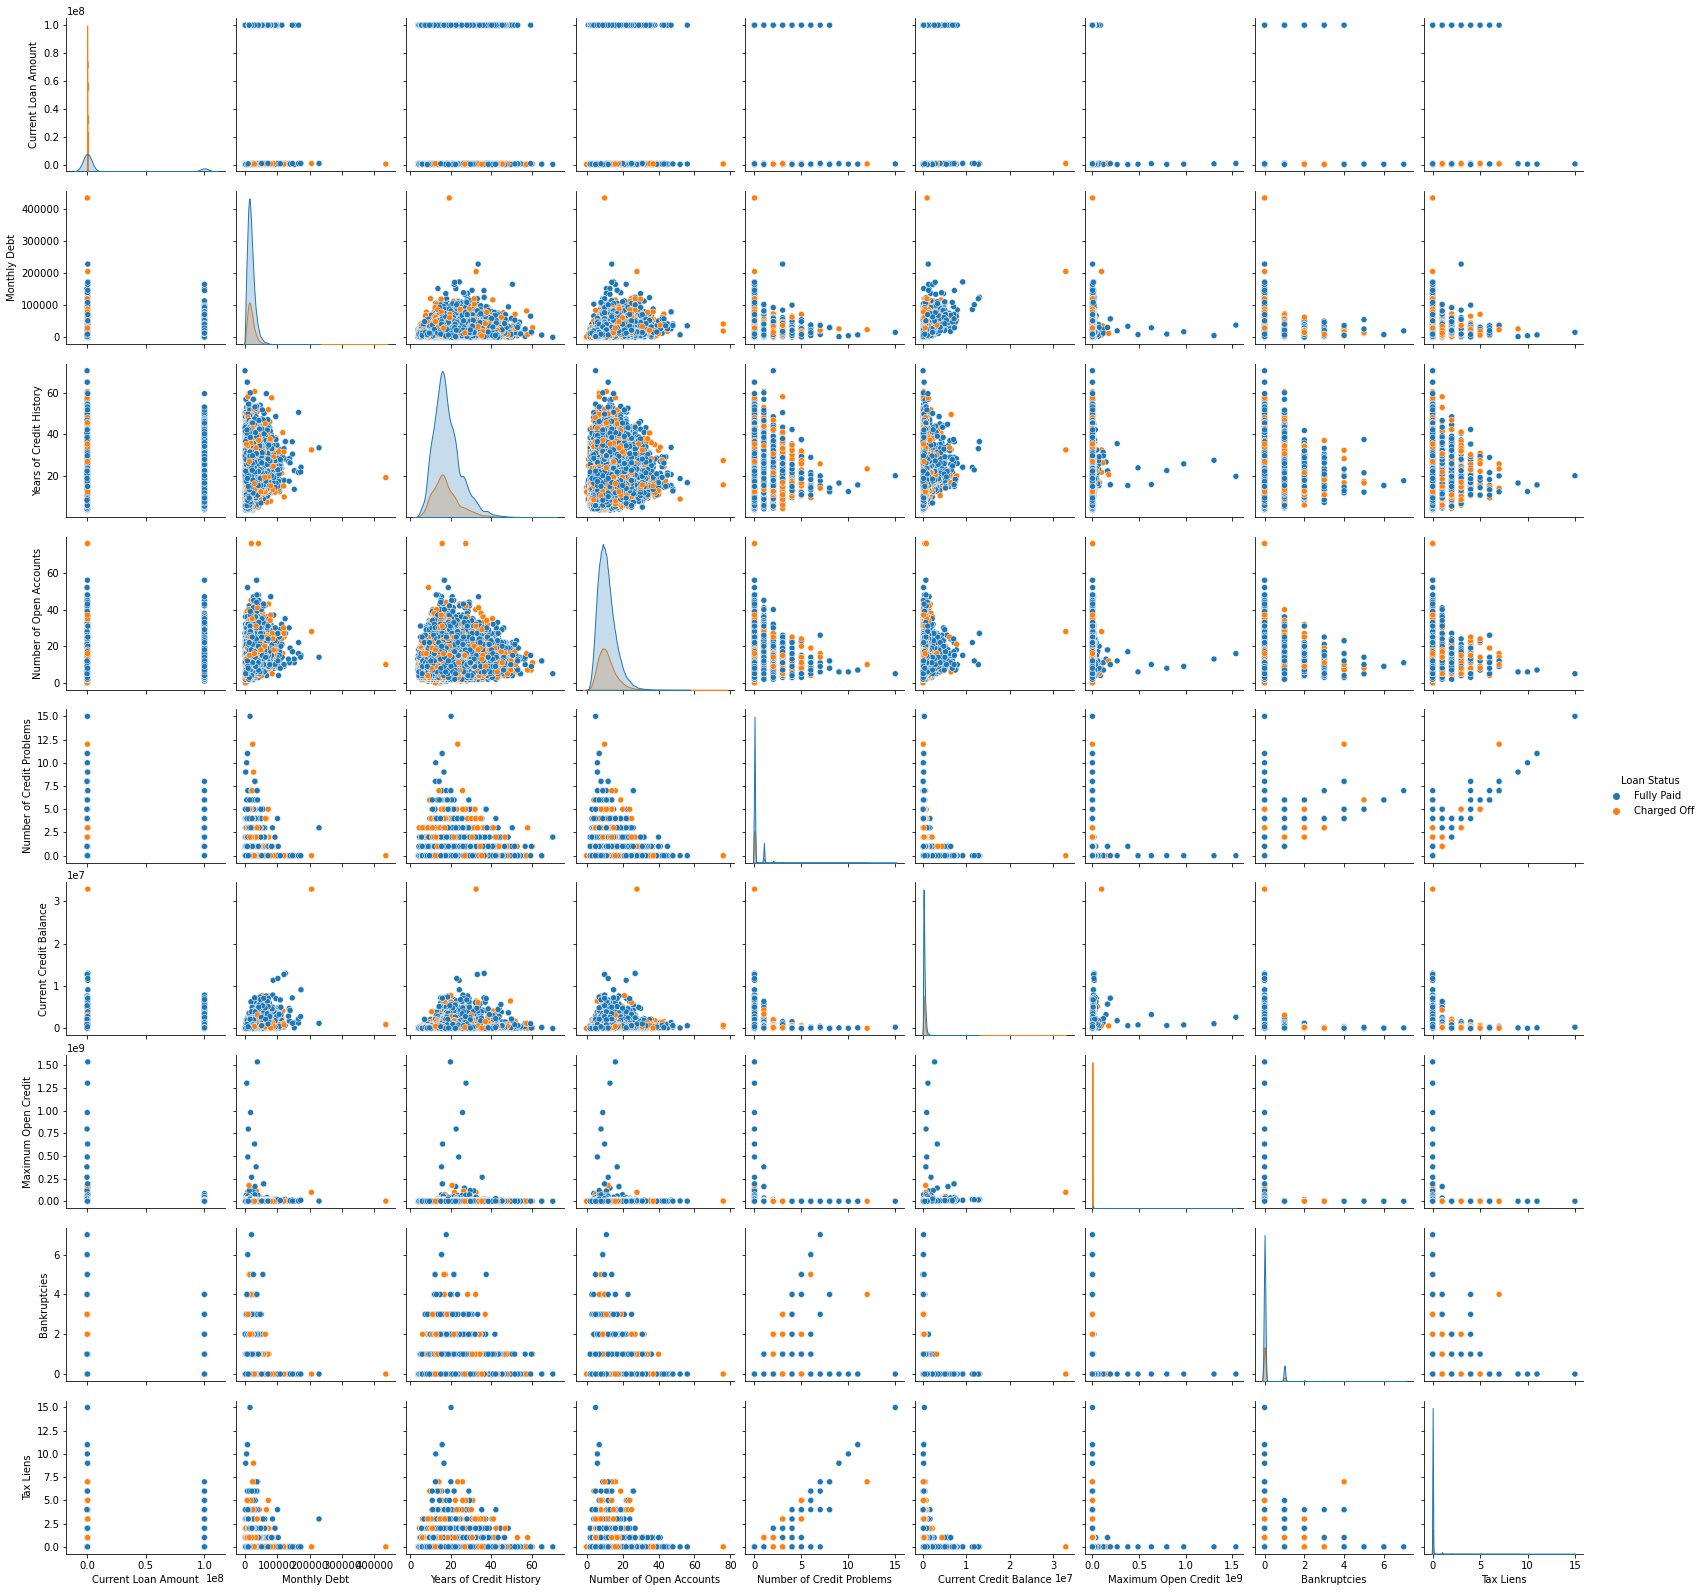

In [21]:
# checking the pairplot for the Dataset
sns.pairplot(df, hue="Loan Status")

In [22]:
df.head()

,Loan Status,Current Loan Amount,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


## Data preprocessing

In [23]:
# splitting the data into X and Y
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [24]:
x

,Current Loan Amount,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,Short Term,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,Short Term,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,Short Term,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,Long Term,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,Short Term,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,210584.0,Short Term,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,147070.0,Short Term,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,99999999.0,Short Term,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,103136.0,Short Term,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [25]:
y

,Loan Status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Fully Paid
...,...
99994,Fully Paid
99995,Fully Paid
99996,Fully Paid
99997,Fully Paid


In [26]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

In [27]:
df_cat

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation
...,...,...,...,...,...
99994,Fully Paid,Short Term,1 year,Home Mortgage,Other
99995,Fully Paid,Short Term,7 years,Own Home,other
99996,Fully Paid,Short Term,1 year,Rent,Debt Consolidation
99997,Fully Paid,Short Term,6 years,Rent,Debt Consolidation


In [28]:
df_num

,Current Loan Amount,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
99994,210584.0,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,147070.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,99999999.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,103136.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [29]:
df["Term"].value_counts()

Short Term    68471
Long Term     27101
Name: Term, dtype: int64

In [30]:
df["Years in current job"].value_counts()

10+ years    31090
2 years       9104
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
9 years       3949
Name: Years in current job, dtype: int64

In [31]:
df["Home Ownership"].value_counts()

Home Mortgage    46414
Rent             40550
Own Home          8403
HaveMortgage       205
Name: Home Ownership, dtype: int64

In [32]:
df["Purpose"].value_counts()


Debt Consolidation      75277
other                    5665
Home Improvements        5511
Other                    3104
Business Loan            1519
Buy a Car                1208
Medical Bills            1041
Buy House                 652
Take a Trip               546
major_purchase            333
small_business            272
moving                    139
wedding                   111
vacation                   95
Educational Expenses       89
renewable_energy           10
Name: Purpose, dtype: int64

In [33]:
# Label encoding the Data
from sklearn.preprocessing import LabelEncoder

In [34]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [35]:
df_cat["Loan Status"].value_counts()

1    74257
0    21315
Name: Loan Status, dtype: int64

In [36]:
df_cat["Term"].value_counts()

1    68471
0    27101
Name: Term, dtype: int64

In [37]:
df_cat["Years in current job"].value_counts()

1     31090
2      9104
3      8151
10     8114
5      6778
0      6436
4      6132
6      5676
7      5573
8      4569
9      3949
Name: Years in current job, dtype: int64

In [38]:
df_cat["Home Ownership"].value_counts()

1    46414
3    40550
2     8403
0      205
Name: Home Ownership, dtype: int64

In [39]:
df_cat["Purpose"].value_counts()

3     75277
11     5665
5      5511
7      3104
0      1519
2      1208
6      1041
1       652
8       546
9       333
13      272
10      139
15      111
14       95
4        89
12       10
Name: Purpose, dtype: int64

In [40]:
#to check the skewness in the data
from scipy.stats import skew

Current Loan Amount
2.4073400201173256


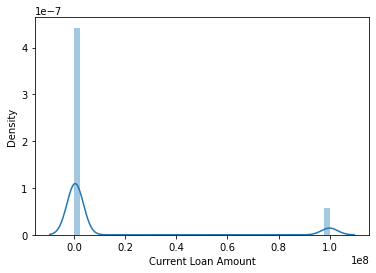

Monthly Debt
2.2332235533720604


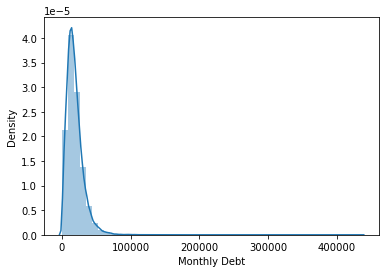

Years of Credit History
1.0211815717490507


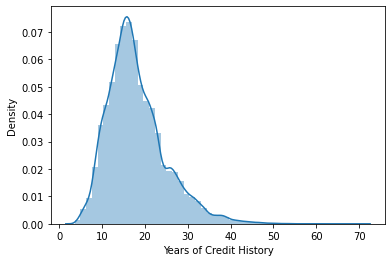

Number of Open Accounts
1.1805318255467454


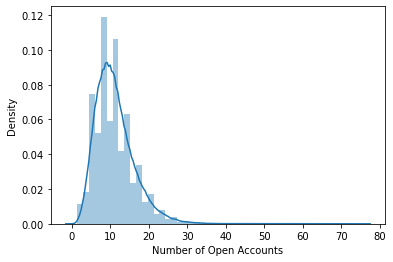

Number of Credit Problems
4.927625182915241


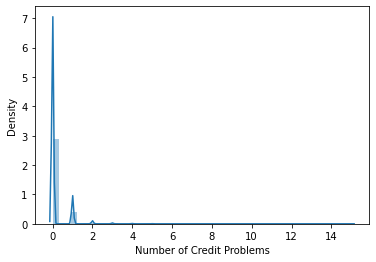

Current Credit Balance
14.358865071844264


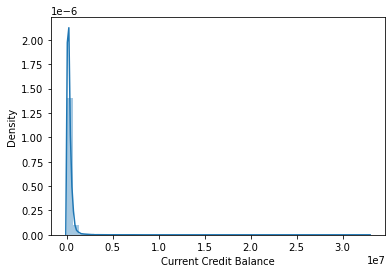

Maximum Open Credit
132.44822712216043


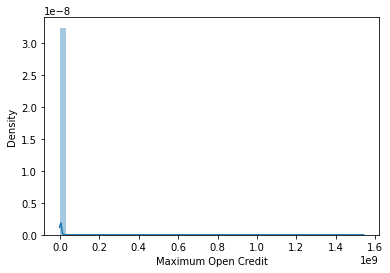

Bankruptcies
3.5779160537124457


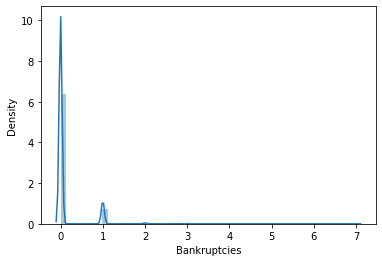

Tax Liens
15.7949934141949


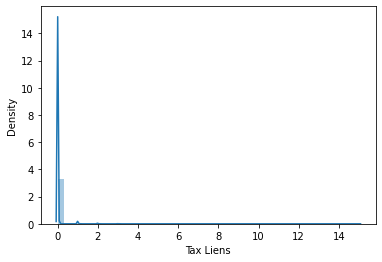

In [41]:
for col in df_num:
    print(col)
    print(skew( df_num[col] ))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [42]:
df =pd.concat([df_cat,df_num], axis = 1)

In [43]:
df.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Current Loan Amount,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,1,8,1,5,445412.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,1,1,1,3,262328.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,1,8,2,3,99999999.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,0,3,2,3,347666.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,1,5,3,3,176220.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [44]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [45]:
x

,Term,Years in current job,Home Ownership,Purpose,Current Loan Amount,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,8,1,5,445412.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,1,1,3,262328.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,8,2,3,99999999.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0,3,2,3,347666.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,5,3,3,176220.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,0,1,7,210584.0,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,1,7,2,11,147070.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1,0,3,3,99999999.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,1,6,3,3,103136.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [46]:
y

,Loan Status
0,1
1,1
2,1
3,1
4,1
...,...
99994,1
99995,1
99996,1
99997,1


### Model creation

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state =0 , stratify = y)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)

In [49]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [50]:
print(classification_report(ytest, ypred))
print()
print(accuracy_score(ytest, ypred))
print()
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.57      0.07      0.12      6395
           1       0.79      0.99      0.87     22277

    accuracy                           0.78     28672
   macro avg       0.68      0.53      0.50     28672
weighted avg       0.74      0.78      0.71     28672


0.7807268415178571

[[  440  5955]
 [  332 21945]]


In [51]:
ytrain.value_counts()

Loan Status
1              51980
0              14920
dtype: int64

In [52]:
!pip install imblearn

### As the data was highly imbalanced, we need to balance the data using imblearn 

In [53]:
# Synthetic minority Oversampling technique(SMOTE)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [54]:
smk = SMOTETomek(random_state = 42)
x1, y1 = smk.fit_resample(x,y)

In [55]:
x1.shape, y1.shape

((144380, 13), (144380, 1))

In [56]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
xtrain1, ytrain1 = ros.fit_resample(x,y)


In [57]:
xtrain1.shape,ytrain1.shape

((148514, 13), (148514, 1))

In [58]:
xtrain1, xtest, ytrain1, ytest = train_test_split(x1,y1, test_size = 0.3, random_state =0)

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain1,ytrain1)
ypred = dt.predict(xtest)
print(classification_report(ytest, ypred))
print()
print(accuracy_score(ytest, ypred))
print()
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     21879
           1       0.79      0.82      0.80     21435

    accuracy                           0.80     43314
   macro avg       0.80      0.80      0.80     43314
weighted avg       0.80      0.80      0.80     43314


0.8023964538024657

[[17159  4720]
 [ 3839 17596]]


In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain1,ytrain1)
ypred = rfc.predict(xtest)

In [61]:
print(classification_report(ytest, ypred))
print()
print(accuracy_score(ytest, ypred))
print()
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84     21879
           1       0.81      0.88      0.85     21435

    accuracy                           0.84     43314
   macro avg       0.84      0.84      0.84     43314
weighted avg       0.84      0.84      0.84     43314


0.8415523849101907

[[17557  4322]
 [ 2541 18894]]


### HyperParameter Tuning to improve the accuracy

In [62]:
rfc1 = RandomForestClassifier(criterion = "entropy")
rfc1.fit(xtrain1,ytrain1)
ypred = rfc1.predict(xtest)
print(classification_report(ytest, ypred))
print()
print(accuracy_score(ytest, ypred))
print()
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84     21879
           1       0.81      0.88      0.85     21435

    accuracy                           0.84     43314
   macro avg       0.84      0.84      0.84     43314
weighted avg       0.84      0.84      0.84     43314


0.8412753382278247

[[17554  4325]
 [ 2550 18885]]


In [63]:
rfc2 = RandomForestClassifier(max_samples = 100)
rfc2.fit(xtrain1,ytrain1)
ypred = rfc2.predict(xtest)
print(classification_report(ytest, ypred))
print()
print(accuracy_score(ytest, ypred))
print()
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69     21879
           1       0.69      0.65      0.67     21435

    accuracy                           0.68     43314
   macro avg       0.68      0.68      0.68     43314
weighted avg       0.68      0.68      0.68     43314


0.6788798079143002

[[15562  6317]
 [ 7592 13843]]


In [64]:
rfc3 = RandomForestClassifier(min_samples_leaf = 50)
rfc3.fit(xtrain1,ytrain1)
ypred = rfc3.predict(xtest)
print(classification_report(ytest, ypred))
print()
print(accuracy_score(ytest, ypred))
print()
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     21879
           1       0.73      0.79      0.76     21435

    accuracy                           0.75     43314
   macro avg       0.75      0.75      0.75     43314
weighted avg       0.75      0.75      0.75     43314


0.7490880546705453

[[15531  6348]
 [ 4520 16915]]


In [65]:
 for i in range(1,100,10):
        rfc4 = RandomForestClassifier(min_samples_leaf = i)
        rfc4.fit(xtrain1,ytrain1)
        ypred = rfc4.predict(xtest)
        print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.8421988271690447
 11 -: 0.7845962044604516
 21 -: 0.7694048113773837
 31 -: 0.7578611996121346
 41 -: 0.7579304612827261
 51 -: 0.746848593988087
 61 -: 0.7447245694232811
 71 -: 0.7412383986701759
 81 -: 0.7391143741053701
 91 -: 0.7372673962229302


In [66]:
for i in range (1,100,10):
    rfc5  = RandomForestClassifier(max_samples = i)
    rfc5.fit(xtrain1,ytrain1)
    ypred = rfc5.predict(xtest)
    print(f" {i}   -: {accuracy_score(ytest,ypred)}")

 1   -: 0.5051253636237706
 11   -: 0.6271413399824537
 21   -: 0.649258900124671
 31   -: 0.6483815856305121
 41   -: 0.6692524357020825
 51   -: 0.6713302858198273
 61   -: 0.6721383386433948
 71   -: 0.6758553816318049
 81   -: 0.6835434270674609
 91   -: 0.6780948423142633


In [67]:
for i in range(1,1000,50):
    rfc6  = RandomForestClassifier(n_estimators = i)
    rfc6.fit(xtrain1,ytrain1)
    ypred = rfc6.predict(xtest)
    print(f" {i}   -: {accuracy_score(ytest,ypred)}")

 1   -: 0.7346585399639839
 51   -: 0.8372812485570486
 101   -: 0.8427067460867156
 151   -: 0.8438149328161795
 201   -: 0.843884194486771
 251   -: 0.8459851318280464
 301   -: 0.8433070138985086
 351   -: 0.8449692939927045
 401   -: 0.844484462298564
 451   -: 0.844992381216235
 501   -: 0.8461005679456989
 551   -: 0.8451539917809484
 601   -: 0.8457311723692109
 651   -: 0.8451309045574179
 701   -: 0.8450847301103569
 751   -: 0.8447153345338689
 801   -: 0.8454310384633144
 851   -: 0.8453156023456619
 901   -: 0.8461698296162904
 951   -: 0.8456157362515584


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc7 = RandomForestClassifier(n_estimators = 950)
rfc7.fit(xtrain1,ytrain1)
ypred = rfc7 .predict(xtest)

In [69]:
print(classification_report(ytest, ypred))
print()
print(accuracy_score(ytest, ypred))
print()
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     21879
           1       0.82      0.89      0.85     21435

    accuracy                           0.85     43314
   macro avg       0.85      0.85      0.85     43314
weighted avg       0.85      0.85      0.85     43314


0.8455003001339059

[[17574  4305]
 [ 2387 19048]]


### Using cross validation getting the mean accuracy

In [70]:
cvs = cross_val_score(rfc7, x1, y1, cv = 5, scoring = "accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}\nStandard Deviation -: {cvs.std()}")

Avg. Accuracy-: 0.8503670868541351
Standard Deviation -: 0.10974338801027816


##  RESULTS
- being a dataset based on the defaulters the percentage of defaulters are really less
- approximately the ratio of people who have paid with who has not paid is 1:4
- balancing the Dataset for an improved accuracy and f1-score
- After splitting the data into train and test we came to know the categorical data needs to be label encoded
- Using two different models we came to know Random forest classifier can be used for this data for an improved accuracy
- did some hyperparameter tuning on the model to increase the accuracy

## CONCLUSION
- The best fit model for this dataset is Random forest classifier with the value of n_estimator parameter at 950
- The average accuracy of the model is 85% 